In [1]:
# データ処理のためのライブラリpandasの取り込み
import pandas as pd

In [2]:
# students.csvからの生徒データの取得
s_df = pd.read_csv("students.csv")
print(len(s_df))
s_df.head()

318


,student_id,gender,leader_flag,support_flag,score
0,1,0,0,0,335
1,2,1,0,0,379
2,3,0,0,0,350
3,4,0,0,0,301
4,5,1,0,0,317


In [3]:
# 学籍番号の確認
s_df["student_id"]

0        1
1        2
2        3
3        4
4        5
      ... 
313    314
314    315
315    316
316    317
317    318
Name: student_id, Length: 318, dtype: int64

In [4]:
# 最大値の確認
s_df["student_id"].max()

np.int64(318)

In [5]:
# 最小値の確認
s_df["student_id"].min()

np.int64(1)

In [6]:
# 1〜318まで隙間なく番号が振られているかの確認
set(range(1, 319)) == set(s_df["student_id"].tolist())

True

In [7]:
# 性別（gender）の確認
s_df["gender"].value_counts()

gender
0    160
1    158
Name: count, dtype: int64

In [8]:
# 学力試験の点数(score)の統計量の確認
s_df["score"].describe()

count    318.000000
mean     303.644654
std       65.179995
min       88.000000
25%      261.000000
50%      310.000000
75%      350.000000
max      485.000000
Name: score, dtype: float64

<Axes: >

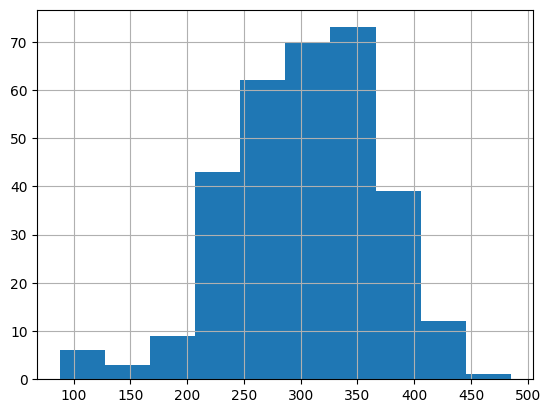

In [9]:
# 学力試験の点数(score)の分布の確認
s_df["score"].hist()

In [10]:
# リーダー気質フラグ(leader_flag)の確認
s_df["leader_flag"].value_counts()

leader_flag
0    301
1     17
Name: count, dtype: int64

In [11]:
# 特別支援フラグ(support_flag)の確認
s_df["support_flag"].value_counts()

support_flag
0    314
1      4
Name: count, dtype: int64

In [12]:
# student_pairs.csvからの特定ペアデータの取得
s_pair_df = pd.read_csv("student_pairs.csv")
print(len(s_pair_df))
s_pair_df

3


,student_id1,student_id2
0,118,189
1,72,50
2,314,233


In [13]:
# PythonライブラリPuLPの取り込み
import pulp

In [14]:
# 数理モデルのインスタンス作成
prob = pulp.LpProblem("ClassAssignmentProblem", pulp.LpMaximize)

In [15]:
# 生徒のリスト
S = s_df["student_id"].tolist()
print(S)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [16]:
# クラスのリスト
C = ["A", "B", "C", "D", "E", "F", "G", "H"]
C

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [17]:
# 生徒とクラスのペアのリスト
SC = [(s, c) for s in S for c in C]
print(SC[:30])

[(1, 'A'), (1, 'B'), (1, 'C'), (1, 'D'), (1, 'E'), (1, 'F'), (1, 'G'), (1, 'H'), (2, 'A'), (2, 'B'), (2, 'C'), (2, 'D'), (2, 'E'), (2, 'F'), (2, 'G'), (2, 'H'), (3, 'A'), (3, 'B'), (3, 'C'), (3, 'D'), (3, 'E'), (3, 'F'), (3, 'G'), (3, 'H'), (4, 'A'), (4, 'B'), (4, 'C'), (4, 'D'), (4, 'E'), (4, 'F')]


In [18]:
# 生徒をどのクラスに割り当てるかを表す 0–1 変数を定義する
# SC は (student_id, class_label) のペアの集合（直積集合）だと仮定している。
# 例えば SC = {(1, 'A'), (1, 'B'), ..., (4, 'F')} のように、
# 「生徒 i をクラス k に入れる」という全ての候補ペアが入っている。
#
# x[(i, k)] の意味：
#   x[(i, k)] = 1 なら「生徒 i をクラス k に割り当てる」
#   x[(i, k)] = 0 なら「生徒 i をクラス k に割り当てない」
#
# これは典型的な割当問題（assignment problem）の定式化で使われる 0–1 整数変数であり、
# 後で「各生徒はちょうど 1 クラスに所属する」「各クラスの定員を超えない」などの制約を
# x[(i, k)] を使って線形制約として記述できるようになる。
x = pulp.LpVariable.dicts("x", SC, cat="Binary")

In [19]:
# (1) 各生徒はちょうど 1 つのクラスに割り当てる制約
# 数学的には、各生徒 s ∈ S について
#   Σ_{c ∈ C} x_{s,c} = 1
# を課している。
# ここで x_{s,c} は「生徒 s をクラス c に割り当てるなら 1、そうでなければ 0」の 0–1 変数。
#
# この制約により：
# - 生徒 s はどこか 1 つのクラスに必ず所属する（左辺が 0 ではなく 1 になる）
# - かつ複数クラスにまたがって所属することはできない（2 以上にはならない）
# という「排他的かつ網羅的」な割当条件を、線形等式制約の形で表現している。
for s in S:
    prob += pulp.lpSum([x[s, c] for c in C]) == 1

In [20]:
# (2) 各クラスの生徒数を 39〜40 人に制限する制約
# 数学的には、各クラス c ∈ C について
#   39 ≤ Σ_{s ∈ S} x_{s,c} ≤ 40
# を課していることになる。
#
# ここで Σ_{s ∈ S} x_{s,c} は「クラス c に割り当てられた生徒数」を表す。
# なぜなら x_{s,c} が「生徒 s をクラス c に入れると 1、入れないと 0」の 0–1 変数だからである。
#
# 下の 2 行の制約は、それぞれ
#   Σ_{s ∈ S} x_{s,c} ≥ 39
#   Σ_{s ∈ S} x_{s,c} ≤ 40
# に対応しており、この 2 つを同時に課すことでクラス c の人数が
# 「最低 39 人、最大 40 人」という狭い範囲に収まるようにしている。
#
# また、x_{s,c} が 0–1 変数であることから、Σ_{s ∈ S} x_{s,c} は必ず整数になり、
# 「39.5 人」などの意味のない値は絶対に出てこない。
# これは整数計画（0–1 整数計画）の重要な性質であり、
# 現実世界の「人数」や「台数」といった離散量を自然に表現できる理由でもある。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S]) >= 39
    prob += pulp.lpSum([x[s, c] for s in S]) <= 40

In [21]:
# 男子生徒のリスト
# s_df は「生徒 ID と属性（gender など）」を持つデータフレームだと仮定している。
# itertuples() で各行をタプルとして取り出し、gender == 1 であればその student_id を取り出している。
#
# ここで gender == 1 を「男子」とみなしている：
#   S_male = { s ∈ S | gender_s = 1 }
# という集合を構成しているイメージ。
# この集合は後の制約で「男子だけを数える」ときに使われる。
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

# 女子生徒のリスト
# 上と同様に、gender == 0 を「女子」とみなして、
#   S_female = { s ∈ S | gender_s = 0 }
# という部分集合を構成している。
# これにより、「女子だけの人数制約」を書くときに集合 S_female を使えるようになる。
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

# (3) 各クラスの男子生徒、女子生徒の人数は 20 人以下とする制約
# 数学的には、各クラス c ∈ C について
#
#   Σ_{s ∈ S_male} x_{s,c} ≤ 20
#   Σ_{s ∈ S_female} x_{s,c} ≤ 20
#
# を課している。
#
# ここで x_{s,c} は 0–1 変数であり、
#   x_{s,c} = 1 なら「生徒 s をクラス c に割り当てる」
#   x_{s,c} = 0 なら「割り当てない」
# という意味を持つので、
#
#   Σ_{s ∈ S_male} x_{s,c}
#
# は「クラス c に所属している男子生徒の人数」を表し、
#
#   Σ_{s ∈ S_female} x_{s,c}
#
# は「クラス c に所属している女子生徒の人数」を表すことになる。
#
# よって、この制約は
#   - どのクラスも男子は最大 20 人
#   - どのクラスも女子は最大 20 人
# を保証しており、「男女比が極端に偏らないクラス編成」という
# 公平性・バランスの条件を線形制約として実装したものになっている。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_male]) <= 20
    prob += pulp.lpSum([x[s, c] for s in S_female]) <= 20

In [22]:
# 学力（テストの素点）を辞書表現に変換
# s_df は「student_id と score（学力試験の点数）」を含むデータフレームと仮定する。
# この内包表記により、
#   score[s] = その生徒 s の得点
# という形でアクセスできる辞書を作っている。
# 後で「クラスごとの総得点」を線形結合で書くときに、この score[s] を係数として利用する。
score = {row.student_id: row.score for row in s_df.itertuples()}

# 学年全体の平均点（スカラー）を算出
# これは「比較基準となるターゲット平均値」であり、
# 各クラスの平均点がこの値 ±10 点の範囲に入るように制約を課す。
score_mean = s_df["score"].mean()
print(score_mean)

# (4) 各クラスの学力試験の平均点は学年平均点 ±10 点とする制約
# 理論的には、各クラス c ∈ C について
#
#   クラス c の平均点
#     = (クラス c の総得点) / (クラス c の人数)
#
# が、学年平均 score_mean を中心に ±10 の範囲に収まるようにしたい。
#
# クラス c の総得点：
#   Σ_{s ∈ S} x_{s,c} * score_s
#
# クラス c の人数：
#   Σ_{s ∈ S} x_{s,c}
#
# なので、本来課したい条件は
#
#   score_mean - 10 ≤ (Σ_{s} x_{s,c} score_s) / (Σ_{s} x_{s,c}) ≤ score_mean + 10
#
# である。
# これは「平均値に対する条件」なので、本質的には比（分数）の不等式になっており、
# そのままでは線形でないように見える。
#
# しかし、両辺にクラス人数 Σ_{s} x_{s,c} を掛けることで
#
#   (score_mean - 10) * Σ_{s} x_{s,c}
#       ≤ Σ_{s} x_{s,c} score_s
#       ≤ (score_mean + 10) * Σ_{s} x_{s,c}
#
# という形に書き換えられる。この形は「係数 × 変数の和」だけからなる線形不等式である。
# したがって、線形計画（整数計画）モデルにそのまま組み込むことができる。
#
# ここでは、左側・右側の不等式をそれぞれ別の制約として実装している。
# なお、別の制約群で「各クラスの人数が 39〜40 人」という条件をすでに課しているため、
# Σ_{s} x_{s,c} が 0（クラスに誰もいない）になることはなく、
# 上記の「平均値の意味」が破綻しないようになっている点も理論的に重要である。
for c in C:
    # 下側の制約：
    #   (score_mean - 10) * Σ_{s} x_{s,c} ≤ Σ_{s} x_{s,c} score_s
    # → クラス平均が score_mean - 10 以上
    prob += (score_mean - 10) * pulp.lpSum([x[s, c] for s in S]) <= pulp.lpSum(
        [x[s, c] * score[s] for s in S]
    )

    # 上側の制約：
    #   Σ_{s} x_{s,c} score_s ≤ (score_mean + 10) * Σ_{s} x_{s,c}
    # → クラス平均が score_mean + 10 以下
    prob += pulp.lpSum([x[s, c] * score[s] for s in S]) <= (
        score_mean + 10
    ) * pulp.lpSum([x[s, c] for s in S])

303.6446540880503


In [23]:
# リーダー気質の生徒の集合
# s_df は生徒ごとの属性（student_id, leader_flag など）を持つデータフレームと仮定している。
# leader_flag == 1 の生徒を「リーダー気質あり」とみなし、
#   S_leader = { s ∈ S | leader_flag_s = 1 }
# という部分集合を構成しているイメージ。
# この集合を使うことで、「リーダー気質の生徒だけを数える」制約を簡潔に記述できる。
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

# (5) 各クラスにリーダー気質の生徒を 2 人以上割り当てる制約
# 数学的には、各クラス c ∈ C について
#
#   Σ_{s ∈ S_leader} x_{s,c} ≥ 2
#
# を課している。
#
# ここで x_{s,c} は 0–1 変数であり、
#   x_{s,c} = 1 なら「生徒 s をクラス c に割り当てる」
#   x_{s,c} = 0 なら「割り当てない」
# という意味を持つ。
#
# よって Σ_{s ∈ S_leader} x_{s,c} は
#   「クラス c に在籍しているリーダー気質の生徒の人数」
# を表す。「2 以上」という下限制約により、どのクラスにも最低 2 人のリーダー候補がいることが保証され、
# クラス内の役割分担やグループワークの推進役が不足しないような編成を、整数計画モデルとして実現している。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_leader]) >= 2

In [24]:
# 特別な支援が必要な生徒の集合
# s_df は、生徒ごとの属性（student_id, support_flag など）を持つデータフレームと仮定している。
# support_flag == 1 の生徒を「特別な支援が必要な生徒」とみなし、
#   S_support = { s ∈ S | support_flag_s = 1 }
# という部分集合を構成しているイメージ。
# この集合を使うことで、「支援が必要な生徒だけ」を数える線形制約を簡潔に書くことができる。
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

# (6) 特別な支援が必要な生徒は各クラスに 1 人以下とする制約
# 数学的には、各クラス c ∈ C について
#
#   Σ_{s ∈ S_support} x_{s,c} ≤ 1
#
# を課している。
#
# ここで x_{s,c} は 0–1 変数であり、
#   x_{s,c} = 1 なら「生徒 s をクラス c に割り当てる」
#   x_{s,c} = 0 なら「割り当てない」
# という意味を持つ。
#
# したがって Σ_{s ∈ S_support} x_{s,c} は、
#   「クラス c に在籍している、特別な支援が必要な生徒の人数」
# を表すことになる。
#
# それを 1 以下に制限することで、
#   - どのクラスにも支援が必要な生徒が「多すぎて教員の負担が集中する」状況を避ける
#   - 支援リソースをクラス間で平等に分散する
# といった運営上のポリシーを、整数計画モデルの制約として形式的に表現している。
#
# この制約は、リーダー配置制約（各クラスに S_leader を 2 人以上）などと組み合わさることで、
# 「負荷と役割のバランスがとれたクラス編成」という全体構造に寄与する。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_support]) <= 1

In [25]:
# 生徒の特定ペアリスト
# s_pair_df は「一緒のクラスにしてはいけない生徒ペア」の一覧を持つデータフレームと仮定している。
# 例えば列名が (student_id1, student_id2) で、
#   student_id1 と student_id2 は同じクラスに入れたくない（トラブル回避、配慮など）
# といったペア情報が行として並んでいるイメージ。
#
# この内包表記により、
#   SS = { (s1, s2), ... }
# という形で、生徒 ID のペアのリストを作っている。
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

# (7) 特定ペアの生徒は同一クラスに割り当てない制約
# 数学的には、各ペア (s1, s2) ∈ SS と各クラス c ∈ C について
#
#   x_{s1,c} + x_{s2,c} ≤ 1
#
# を課している。
#
# ここで x_{s,c} は 0–1 変数であり、
#   x_{s,c} = 1 なら「生徒 s をクラス c に割り当てる」
#   x_{s,c} = 0 なら「割り当てない」
# という意味を持つ。
#
# このとき、もし s1 と s2 の両方を同じクラス c に入れようとすると、
#   x_{s1,c} = 1 かつ x_{s2,c} = 1
# となり、左辺 x_{s1,c} + x_{s2,c} = 2 > 1 となって制約違反になる。
# したがって「同一クラスに同居すること」は禁止される。
#
# 一方で、
#   - 片方だけクラス c に所属する（もう片方は別クラス）場合は、
#     x_{s1,c} + x_{s2,c} = 1 ≤ 1 なので許容される。
#   - どちらもそのクラスに所属しない場合は 0 ≤ 1 なので当然許容される。
#
# このように、この制約は「特定ペアを同じクラスにしない」という
# 論理的な条件（排他的条件）を、線形の 0–1 制約として表現したものになっている。
# これは 0–1 整数計画で頻出するパターンで、
#   「2つのバイナリ変数を同時に 1 にしてはいけない」
# という関係を一般に
#   x + y ≤ 1
# の形で書く典型例である。
for s1, s2 in SS:
    for c in C:
        prob += x[s1, c] + x[s2, c] <= 1

In [ ]:
# 求解
status = prob.solve()
print(status)
print(pulp.LpStatus[status])

In [27]:
# 最適化結果の表示
# 各クラスに割り当てられている生徒のリストを辞書に格納
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s, c].value() == 1]

for c, Ss in C2Ss.items():
    print("Class:", c)
    print("Num:", len(Ss))
    print("Student:", Ss)
    print()

Class: A
Num: 39
Student: [2, 9, 19, 39, 42, 63, 65, 71, 79, 83, 85, 88, 99, 109, 111, 123, 126, 136, 138, 145, 148, 165, 168, 173, 177, 179, 180, 193, 199, 206, 224, 233, 240, 246, 264, 267, 291, 292, 298]

Class: B
Num: 40
Student: [11, 15, 43, 48, 50, 70, 82, 89, 91, 102, 104, 113, 114, 120, 121, 124, 127, 146, 149, 159, 167, 170, 172, 176, 190, 203, 213, 220, 222, 231, 238, 245, 263, 270, 275, 276, 283, 287, 290, 317]

Class: C
Num: 40
Student: [3, 14, 23, 27, 31, 33, 41, 49, 53, 54, 58, 73, 93, 97, 98, 107, 122, 152, 156, 160, 171, 187, 201, 210, 211, 217, 219, 227, 236, 242, 254, 258, 260, 268, 273, 274, 277, 278, 301, 318]

Class: D
Num: 40
Student: [10, 13, 16, 36, 37, 51, 56, 59, 61, 67, 68, 75, 84, 92, 108, 128, 134, 139, 140, 158, 161, 175, 183, 188, 192, 198, 200, 205, 221, 225, 235, 241, 252, 255, 256, 257, 261, 266, 293, 316]

Class: E
Num: 39
Student: [4, 5, 21, 22, 24, 38, 69, 72, 78, 87, 96, 105, 106, 115, 129, 132, 141, 143, 150, 154, 164, 166, 184, 189, 195, 196, 197

SyntaxError: invalid character '、' (U+3001) (1908102876.py, line 3)

In [ ]:
import pandas as pd
import pulp

# 生徒情報（students.csv）と「同じクラスにしてはいけないペア」（student_pairs.csv）を読み込む
# これらは最適化モデルにおける「入力データ」となる。
s_df = pd.read_csv("students.csv")
s_pair_df = pd.read_csv("student_pairs.csv")

# 数理最適化モデル（線形 / 整数計画モデル）の定義
# 第2引数 LpMaximize は「最大化問題」として定義しているが、
# このコードでは目的関数をまだ追加していないため、
# 実際には「制約を満たす可行解を見つける問題（実質 0 を最大化）」になっている。
prob = pulp.LpProblem("ClassAssignmentProblem", pulp.LpMaximize)

# 生徒のリスト S = {1, 2, ..., N}
# student_id 列をそのまま集合 S として用いる。
S = s_df["student_id"].tolist()

# クラスのリスト C = {'A', 'B', ..., 'H'}
# クラス数 |C| = 8 を固定で与えている。
C = ["A", "B", "C", "D", "E", "F", "G", "H"]

# 生徒とクラスのペアのリスト
# SC = {(s, c) | s ∈ S, c ∈ C} という直積集合に対応。
# 各ペア (s, c) について「生徒 s をクラス c に割り当てるかどうか」を表す 0–1 変数を定義する。
SC = [(s, c) for s in S for c in C]

# 生徒をどのクラスに割り当てるかを表す 0–1 変数 x_(s,c) を定義
# x[(s, c)] = 1 なら「生徒 s をクラス c に割り当てる」、0 なら割り当てない。
# 変数の集合としては {x_(s,c) | (s,c) ∈ SC} ⊂ {0,1}^{|S||C|} となる。
x = pulp.LpVariable.dicts("x", SC, cat="Binary")

# (1) 各生徒は 1 つのクラスに割り当てる制約
# 数学的には、各 s ∈ S について
#   Σ_{c∈C} x_(s,c) = 1
# を課している。これにより
# - どの生徒も必ずどこか 1 クラスに所属する（0 にはならない）
# - 複数クラスにまたがって所属することはない（2 以上にはならない）
# という「排他的かつ網羅的な割当条件」が表現される。
for s in S:
    prob += pulp.lpSum([x[s, c] for c in C]) == 1

# (2) 各クラスの生徒数は 39 人以上 40 人以下という制約
# 各 c ∈ C について、
#   39 ≤ Σ_{s∈S} x_(s,c) ≤ 40
# を課すことで、「クラス人数がほぼ均等かつ一定範囲に収まる」ようにしている。
# ここで Σ_{s} x_(s,c) はクラス c の生徒数を表す（x_(s,c) は 0–1 なので必ず整数）。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S]) >= 39
    prob += pulp.lpSum([x[s, c] for s in S]) <= 40

# 男子生徒のリスト S_male = {s ∈ S | gender_s = 1}
# s_df.itertuples() から gender == 1 の行だけを抽出している。
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

# 女子生徒のリスト S_female = {s ∈ S | gender_s = 0}
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

# (3) 各クラスの男子生徒・女子生徒の人数は 20 人以下という制約
# 各 c ∈ C について、
#   Σ_{s∈S_male} x_(s,c) ≤ 20
#   Σ_{s∈S_female} x_(s,c) ≤ 20
# を課している。
# これは「部分集合（男子・女子）ごとの人数の上限」を表す制約であり、
# クラス内の男女比が極端に偏らないようにするフェアネス制約の一種になっている。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_male]) <= 20
    prob += pulp.lpSum([x[s, c] for s in S_female]) <= 20

# 学力（テストスコア）を辞書に変換
# score[s] = 生徒 s の点数 としてアクセスできるようにしておく。
# 後で「クラスごとの総得点」や「平均点制約」を線形和で書くときに使用する。
score = {row.student_id: row.score for row in s_df.itertuples()}

# 学年全体の平均点（スカラー）を算出
# これはクラス平均点の許容範囲を決める基準値として使われる（±10 点の中心）。
score_mean = s_df.score.mean()

# (4) 各クラスの学力試験の平均点は「学年平均点 ±10 点」とする制約
# クラス c の平均点は
#   ( Σ_{s∈S} x_(s,c) * score[s] ) / ( Σ_{s∈S} x_(s,c) )
# で定義されるが、これは分数になっているため、線形計画の形に直接は入れられない。
#
# そこで「平均値が score_mean ±10 の範囲に入る」という条件
#   score_mean - 10 ≤ 平均点 ≤ score_mean + 10
# を、両辺に Σ_{s} x_(s,c) を掛けることで
#
#   (score_mean - 10) * Σ_{s} x_(s,c)
#       ≤ Σ_{s} x_(s,c) * score[s]
#       ≤ (score_mean + 10) * Σ_{s} x_(s,c)
#
# という線形不等式に変形している。
# ここで、別途クラス人数に 39〜40 の下限・上限を課しているため、
# Σ_{s} x_(s,c) が 0（誰もいないクラス）になることはなく、
# 平均値としての意味が維持されている点が理論的に重要。
for c in C:
    # 下限側：クラス c の総得点 ≥ (平均 - 10) × クラス人数
    prob += pulp.lpSum([x[s, c] * score[s] for s in S]) >= (
        score_mean - 10
    ) * pulp.lpSum([x[s, c] for s in S])
    # 上限側：クラス c の総得点 ≤ (平均 + 10) × クラス人数
    prob += pulp.lpSum([x[s, c] * score[s] for s in S]) <= (
        score_mean + 10
    ) * pulp.lpSum([x[s, c] for s in S])

# リーダー気質の生徒の集合 S_leader = {s ∈ S | leader_flag_s = 1}
# この集合を用いて「各クラスにリーダー気質の生徒が何人いるか」を数える。
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

# (5) 各クラスにリーダー気質の生徒を 2 人以上配置する制約
# 各 c ∈ C について、
#   Σ_{s∈S_leader} x_(s,c) ≥ 2
# を課している。
# これは「クラスごとに最低 2 人のリーダー候補を配置する」ことで、
# グループ内でのファシリテーションや役割分担が機能するようにする意図を、
# 0–1 線形制約として表現している。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_leader]) >= 2

# 特別な支援が必要な生徒の集合 S_support = {s ∈ S | support_flag_s = 1}
# この集合を用いて「支援が必要な生徒だけの人数」をクラスごとに数える。
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

# (6) 特別な支援が必要な生徒は各クラスに 1 人以下とする制約
# 各 c ∈ C について、
#   Σ_{s∈S_support} x_(s,c) ≤ 1
# を課している。
# これにより、「支援が必要な生徒が特定のクラスに集中してしまう」状況を避け、
# 支援リソースがクラス間で分散されるようにしている。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_support]) <= 1

    # 生徒の特定ペアリスト SS
    # s_pair_df は「同じクラスにしてはいけないペア (student_id1, student_id2)」を列で持つデータフレームと仮定。
    # この行は for ループの中にインデントされているが、内容的にはループの外で 1 回だけ作れば十分（現状でも動作自体はする）。
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

# (7) 特定ペアの生徒は同一クラスに割り当てない制約
# 各ペア (s1, s2) と各クラス c に対して、
#   x_(s1,c) + x_(s2,c) ≤ 1
# を課している。
# これは 0–1 整数計画でよく使われる「2 つのバイナリ変数を同時に 1 にしてはいけない」というパターンであり、
# トラブル回避などの理由で「この 2 人を同じクラスにしない」という論理条件を
# 線形制約として表現している。
for row in s_pair_df.itertuples():
    s1 = row.student_id1
    s2 = row.student_id2
    for c in C:
        prob += x[s1, c] + x[s2, c] <= 1

# 求解（ソルバーによる最適化）
# 現在は目的関数を設定していないため、「制約を満たす任意の可行解」を探す問題として解かれる。
status = prob.solve()
print("Status:", pulp.LpStatus[status])

# 最適化結果の表示
# 各クラス c に割り当てられている生徒のリスト C2Ss[c] を作成し、人数と ID を出力する。
C2Ss = {}
for c in C:
    # x[s, c].value() == 1 となっている s だけがクラス c に所属している生徒。
    C2Ss[c] = [s for s in S if x[s, c].value() == 1]

for c, Ss in C2Ss.items():
    print("Class:", c)
    print("Num:", len(Ss))  # クラス c の生徒数（定員制約 39〜40 と一致するはず）
    print("Student:", Ss)  # 割り当てられた生徒 ID の一覧
    print()

In [30]:
for s in S:
    # 生徒 s に対して、どのクラス c に割り当てられているかを調べる。
    # x[s, c].value() は最適化後の変数値（0 または 1）であり、
    # 「x_(s,c) = 1 になっているクラス c だけを集めたリスト」が assigned_class になる。
    assigned_class = [c for c in C if x[s, c].value() == 1]

    # 1つのクラスにだけ割り当てられているかをチェックする。
    # 理論上は制約 (1) により
    #   Σ_{c∈C} x_(s,c) = 1
    # を課しているので、必ず「ちょうど 1 つのクラス」に所属しているはずである。
    # もし len(assigned_class) が 1 でない場合は、
    #   - モデルの定式化に誤りがある
    #   - ソルバーが最適化に失敗している
    #   - 変数の読み出しロジックに問題がある
    # といった異常の可能性があるため、デバッグ用にエラー情報を表示している。
    if len(assigned_class) != 1:
        print("error:", s, assigned_class)

In [31]:
# 検証用のデータフレームの用意
# 元の生徒情報 s_df をそのままコピーして、そこに「どのクラスに割り当てられたか」という
# 最適化結果を付け足していくためのデータフレームを作成している。
# こうすることで、「入力データ（性別・得点・フラグなど）」と「最終的なクラス割当」を
# 1 つのテーブルとしてまとめて確認できるようになる。
result_df = s_df.copy()

# 各生徒がどのクラスに割り当てられたかの情報を辞書に格納
# S2C は「生徒 → クラス」の対応（関数）を表す辞書。
# 内包表記の構造：
#   { s: c for s in S for c in C if x[s, c].value() == 1 }
# となっており、最適化後の解 x[s,c].value() が 1 になっている (s, c) の組だけを拾って、
# キー s（生徒 ID）、値 c（クラス名）として格納している。
#
# 理論的には、制約 Σ_{c∈C} x_(s,c) = 1 によって、
# 各 s には「高々 1 つの c で x_(s,c) = 1」が存在するはずなので、
#   S2C[s] = その生徒 s が所属しているクラス
# という写像（関数）として正しく定義される。
S2C = {s: c for s in S for c in C if x[s, c].value() == 1}

# 生徒データに各生徒がどのクラスに割り当てられたかの情報を結合
# result_df['student_id'] の値（生徒 ID）をキーとして S2C を参照し、
# 対応するクラス名を 'assigned_class' 列として付与している。
#
# pandas.Series.map(dict) は、シリーズの各要素 v に対して dict[v] を返す操作であり、
# ここでは
#   student_id s → S2C[s] = 割り当てクラス
# という形で、生徒ごとのクラス割り当て結果を列として取り込んでいる。
#
# これにより、result_df には
#   (student_id, gender, score, ..., assigned_class)
# という構造が揃い、クラスごとの集計や可視化、
# 「制約どおりになっているか」の検証などを簡単に行えるようになる。
result_df["assigned_class"] = result_df["student_id"].map(S2C)

# 先頭 5 行を表示して、割り当て結果が期待どおり結合できているかをざっと確認する。
result_df.head(5)

,student_id,gender,leader_flag,support_flag,score,assigned_class
0,1,0,0,0,335,F
1,2,1,0,0,379,A
2,3,0,0,0,350,C
3,4,0,0,0,301,B
4,5,1,0,0,317,E


In [32]:
# クラスごとの生徒数を集計して、制約 (2) が満たされているかを確認するための集計処理
# ここでの狙い：
#   - 各クラス c に対して、生徒が何人割り当てられているかを数える
#   - 「39〜40 人」という定員制約が実際の解でも守られているかを、データとして検証する
#
# 処理の流れ：
#   1. result_df.groupby('assigned_class')
#        → 'assigned_class' 列（クラス名）ごとに行をグループ化する。
#           つまり「A クラスの生徒だけ」「B クラスの生徒だけ」…という部分集合に分ける操作。
#
#   2. ['student_id']
#        → 各グループから 'student_id' 列だけを取り出す。
#           ここでは「生徒の人数を数える」ことが目的なので、ID 列を対象にするのが自然。
#
#   3. .count()
#        → 各グループごとに要素数（行数）を数える。
#           つまり「そのクラスに割り当てられた生徒の人数」を返す。
#
# 結果として得られる Series は、
#   index:   クラス名（'A', 'B', ..., 'H'）
#   values:  各クラスに所属している生徒数
# となるので、これがすべて 39 または 40 になっていれば、
# 数理モデルで課した定員制約が実際の解で守られていることの確認になる。
result_df.groupby("assigned_class")["student_id"].count()

assigned_class
A    39
B    40
C    40
D    40
E    40
F    40
G    40
H    39
Name: student_id, dtype: int64

In [33]:
# クラスと性別ごとに生徒数を集計し、制約 (3)（男子・女子ともに各クラス 20 人以下）が
# 実際の解で満たされているかを検証するための集計処理。
#
# 処理の流れ：
#   1. result_df.groupby(['assigned_class', 'gender'])
#        → 'assigned_class'（クラス名）と 'gender'（性別フラグ）の組み合わせごとに行をグループ化する。
#           つまり、
#             ('A', 0): A クラスの女子だけ
#             ('A', 1): A クラスの男子だけ
#             ('B', 0): B クラスの女子だけ
#             ...
#           のような 2 次元のグループ分けを行う。
#
#   2. ['student_id']
#        → 各グループから 'student_id' 列だけを取り出す。
#           ここでは「人数」を数えることが目的なので、ID 列を対象とする。
#
#   3. .count()
#        → 各 (クラス, 性別) グループごとに行数（= 生徒数）を数える。
#
# 結果として、
#   index:  (assigned_class, gender) のタプル（例: ('A', 0), ('A', 1), ...）
#   value:  そのクラス・性別の組み合わせに属する生徒数
# が得られる。
#
# この出力を見れば、各クラスにおける男子・女子の人数が一目で分かり、
# 「どのクラスでも男子 ≤ 20、女子 ≤ 20」というモデリング上の制約が実際に守られているか
# をデータの側から検証できる。
result_df.groupby(["assigned_class", "gender"])["student_id"].count()

assigned_class  gender
A               0         20
                1         19
B               0         20
                1         20
C               0         20
                1         20
D               0         20
                1         20
E               0         20
                1         20
F               0         20
                1         20
G               0         20
                1         20
H               0         20
                1         19
Name: student_id, dtype: int64

In [34]:
# クラスごとの平均点を集計し、制約 (4)（各クラスの平均点が学年平均 ±10 点の範囲内）が
# 実際の解で満たされているかを検証するための集計処理。
#
# 処理の流れ：
#   1. result_df.groupby('assigned_class')
#        → 'assigned_class' 列（クラス名）ごとに行をグループ化する。
#           つまり「A クラスの生徒だけ」「B クラスの生徒だけ」…という部分集合を作る操作。
#
#   2. ['score']
#        → 各グループから 'score' 列（テストの点数）だけを取り出す。
#           ここでは「平均点」を知りたいので、対象は score 列になる。
#
#   3. .mean()
#        → 各クラスの score 列の平均値を計算する。
#           これは理論的には
#             平均点_クラスc = ( Σ_{s∈クラスc} score_s ) / ( 人数_クラスc )
#           に対応しており、モデル内で課した
#             score_mean - 10 ≤ 平均点_クラスc ≤ score_mean + 10
#           という制約が実際に守られているかを確認するための実データ上のチェックになる。
#
# 出力結果を見て、すべてのクラスの平均が
#   [score_mean - 10, score_mean + 10]
# に入っていることを確認できれば、線形制約として実装した「平均点制約」が
# 正しく機能していると言える。
result_df.groupby("assigned_class")["score"].mean()

assigned_class
A    309.000000
B    303.300000
C    312.125000
D    308.600000
E    294.750000
F    294.675000
G    312.200000
H    294.410256
Name: score, dtype: float64

In [35]:
# クラスごとのリーダー気質の生徒数を集計し、
# 制約 (5)「各クラスにリーダー気質の生徒を 2 人以上割り当てる」が
# 実際の解で満たされているかを検証するための集計処理。
#
# 処理の流れ：
#   1. result_df.groupby(['assigned_class'])
#        → 'assigned_class' 列（クラス名）ごとに行をグループ化する。
#           つまり「A クラスの生徒全員」「B クラスの生徒全員」…という部分集合を作る。
#
#   2. ['leader_flag']
#        → 各グループから 'leader_flag' 列だけを取り出す。
#           leader_flag は
#             1: リーダー気質あり
#             0: それ以外
#           のような 0–1 フラグになっていると仮定している。
#
#   3. .sum()
#        → 各クラスに属する生徒の leader_flag を合計する。
#           フラグが 0–1 なので、単純な合計が
#             「そのクラスにいるリーダー気質の生徒数」
#           に一致する。
#
# これにより、クラス c ごとに
#   Σ_{s∈クラスc} leader_flag_s
# を計算しており、この値がすべてのクラスで 2 以上になっていれば、
# 数理モデルで課した制約
#   Σ_{s∈S_leader} x_(s,c) ≥ 2
# が実際の解でも満たされていることをデータ側から確認できる。
result_df.groupby(["assigned_class"])["leader_flag"].sum()

assigned_class
A    3
B    2
C    2
D    2
E    2
F    2
G    2
H    2
Name: leader_flag, dtype: int64

In [36]:
# クラスごとの「特別な支援が必要な生徒」の人数を集計し、
# 制約 (6)「特別な支援が必要な生徒は各クラスに 1 人以下」が
# 実際の解で満たされているかを検証するための集計処理。
#
# 処理の流れ：
#   1. result_df.groupby(['assigned_class'])
#        → 'assigned_class'（クラス名）ごとに行をグループ化する。
#           つまり、「A クラスの全生徒」「B クラスの全生徒」…という集合に分割する。
#
#   2. ['support_flag']
#        → 各グループから 'support_flag' 列だけを取り出す。
#           support_flag は
#             1: 特別な支援が必要な生徒
#             0: それ以外
#           の 0–1 フラグになっていると仮定している。
#
#   3. .sum()
#        → 各クラスに属する生徒の support_flag を単純に合計する。
#           フラグが 0–1 なので、この合計は
#             「そのクラスに在籍している要支援生徒の人数」
#           にそのまま一致する。
#
# 数理モデル側では、各クラス c について
#   Σ_{s∈S_support} x_(s,c) ≤ 1
# という制約を課しているため、
# この集計結果の各クラスの値は理論上 0 または 1 になるはずである。
# ここで 2 以上の値が出ていれば、モデル定式化・制約・実装のいずれかに不具合があることを意味する。
result_df.groupby(["assigned_class"])["support_flag"].sum()

assigned_class
A    0
B    1
C    1
D    0
E    1
F    0
G    1
H    0
Name: support_flag, dtype: int64

In [37]:
# 特定ペア (s1, s2) ごとに、実際のクラス割り当て結果を確認するためのループ
# ここでは、モデルで課した制約 (7)：
#   「特定ペアの生徒は同一クラスに割り当てない」
# が実際の解で守られているかを、ペアごとに明示的にチェックしている。
#
# SS は (student_id1, student_id2) のタプルからなるリストで、
#   SS = {(s1, s2), ...}
# のように「同じクラスにしてはいけないペア」を表している。
#
# S2C は「生徒 → 割り当てクラス」の写像（辞書）で、
#   S2C[s] = 生徒 s が最適化結果で所属しているクラス
# になっている前提。
for i, (s1, s2) in enumerate(SS):
    # 何番目のペアかを識別するためのインデックス i を一緒に表示
    print("case:", i)

    # ペアの 1 人目 s1 がどのクラスに割り当てられたかを取得
    #   c1 = S2C[s1]
    # となるので、「s1 はクラス c1 に所属」という情報を得る。
    c1 = S2C[s1]

    # ペアの 2 人目 s2 がどのクラスに割り当てられたかを取得
    #   c2 = S2C[s2]
    # となるので、「s2 はクラス c2 に所属」という情報を得る。
    c2 = S2C[s2]

    # 1 人目の生徒 ID と、その生徒が所属するクラスを表示
    # 表示例： s1:12-A  （生徒 12 はクラス A）
    print("s1:{}-{}".format(s1, c1))

    # 2 人目の生徒 ID と、その生徒が所属するクラスを表示
    print("s2:{}-{}".format(s2, c2))

    # 見やすさのために空行を挿入
    print("")

case: 0
s1:118-G
s2:189-E

case: 1
s1:72-E
s2:50-B

case: 2
s1:314-H
s2:233-A



In [38]:
# データの可視化ライブラリmatplotlibの取り込み
import matplotlib.pyplot as plt

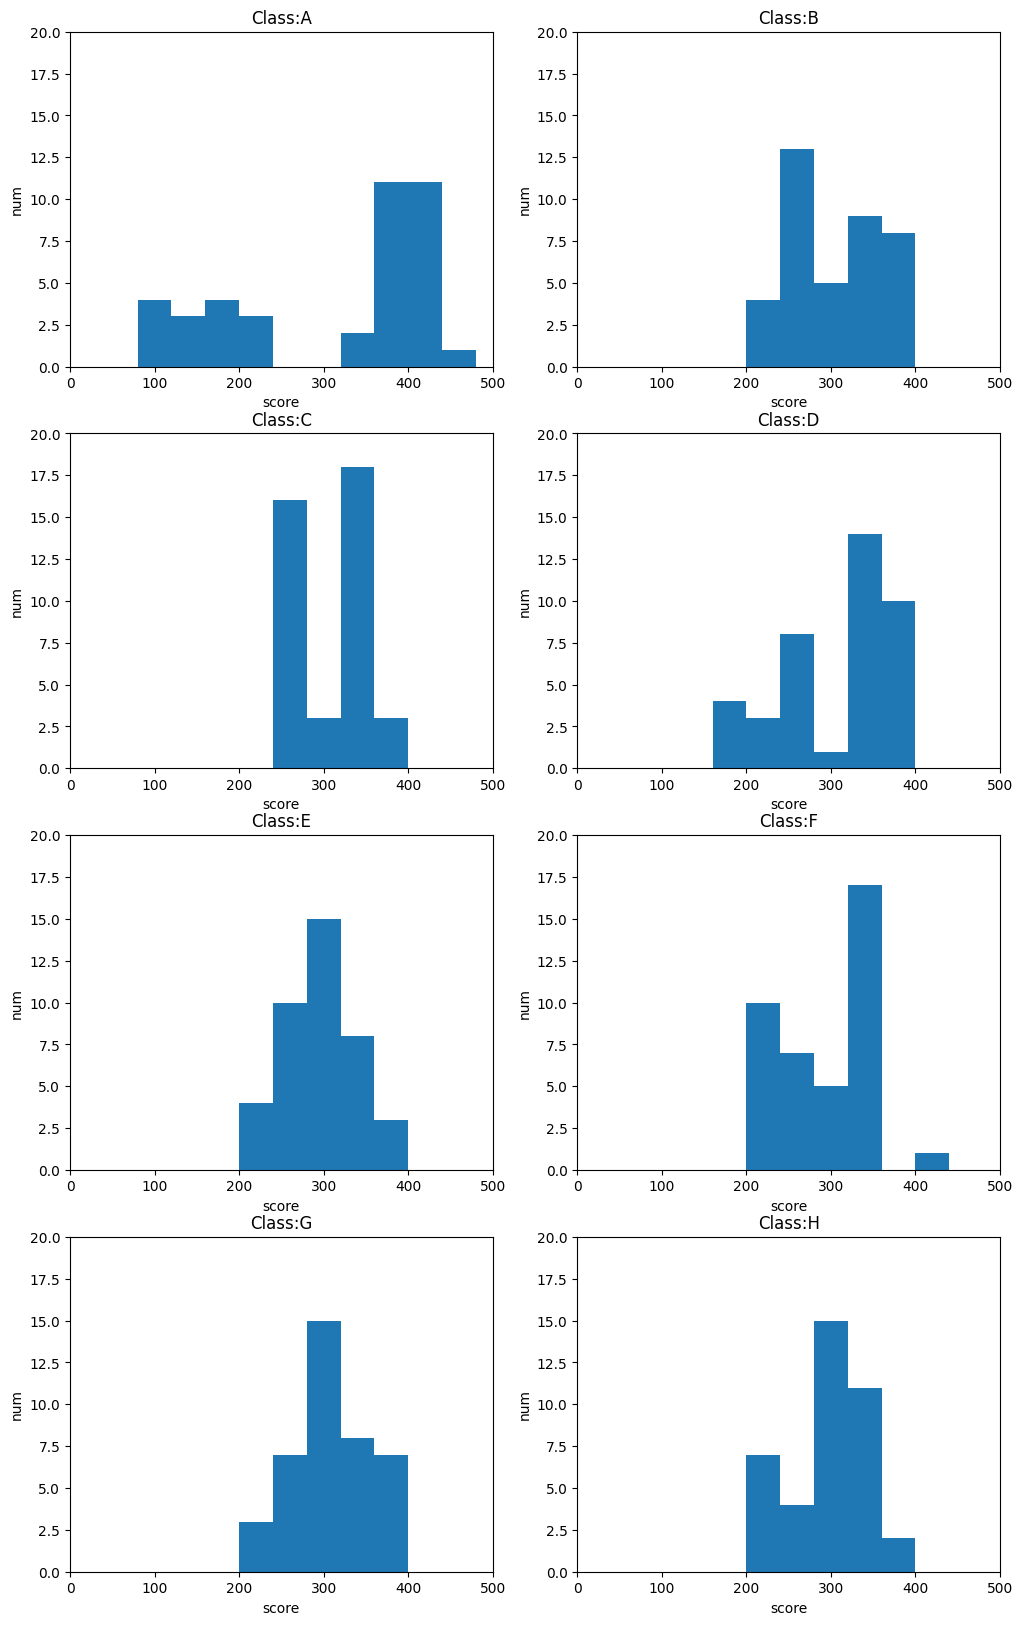

In [39]:
fig = plt.figure(figsize=(12, 20))
for i, c in enumerate(C):
    cls_df = result_df[result_df["assigned_class"] == c]
    ax = fig.add_subplot(
        4,
        2,
        i + 1,
        xlabel="score",
        ylabel="num",
        xlim=(0, 500),
        ylim=(0, 20),
        title="Class:{:s}".format(c),
    )
    ax.hist(cls_df["score"], bins=range(0, 500, 40))

In [40]:
# 初期クラス編成のデータを作成
# ここでは「最適化前のたたき台となるクラス編成案」を作るために、
# 学力（score）に基づいて単純なルールでクラスを割り当てている。
# この初期案は、後の整数計画モデルでのクラス編成結果と比較したり、
# 「どの程度バランスが改善されたか」を評価するためのベースラインとして機能する。

# 学力をもとに順位を付与
# rank(ascending=False, method='first') は、
#   - ascending=False : score が高いほど順位が「小さい」ように並べる（降順ランキング）
#   - method='first'  : 同点の場合は出現順（行の順番）で順位を割り当てる（同順位にはしない）
# を意味する。
#
# これにより、score_rank は
#   score_rank = 1 → 学年で最も点数が高い生徒
#   score_rank = 2 → 2 番目に高い生徒
#   ...
# という「一意な順位」を表す変数になる。
# 理論的には、ランキングを用いることで「上位・中位・下位」を交互にクラスに振り分けるような
# スキームが簡単に記述できるようになる。
s_df["score_rank"] = s_df["score"].rank(ascending=False, method="first")

# 学力順にクラス編成し、init_assigned_class カラムを作成
# class_dic は「整数 0〜7 をクラス名 'A'〜'H' に対応させる辞書」で、
#   0 → 'A', 1 → 'B', ..., 7 → 'H'
# という写像を表している。
class_dic = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H"}

# s_df['score_rank'] に対して、
#   1. lambda x: x % 8
#        → ランク番号 x を 8 で割った剰余（0〜7）に変換する。
#        例えば x = 1,2,...,8,9,10,... に対して
#          1 % 8 = 1
#          2 % 8 = 2
#          ...
#          7 % 8 = 7
#          8 % 8 = 0
#          9 % 8 = 1
#        というように、8 人ごとに 0〜7 のパターンが繰り返される。
#
#      この操作の理論的意味：
#        「学力上位から順に、クラス A〜H にラウンドロビンで割り当てる」
#      という構造を作っている。
#        - 1 番目 → B（1 % 8 = 1 → 'B'）
#        - 2 番目 → C
#        ...
#        - 7 番目 → H
#        - 8 番目 → A（8 % 8 = 0 → 'A'）
#      といった形で、8 クラスをぐるぐる回しながら上位・中位・下位の生徒を分散させていく。
#
#   2. .map(class_dic)
#        → 得られた 0〜7 の値を class_dic でクラス名 'A'〜'H' に変換し、
#           最終的に「初期割当クラス init_assigned_class」として文字列を格納する。
#
# この方法のポイント：
#   - 学力が高い順にクラスをローテーションするため、
#     「A クラスだけが上位層だらけ」「H クラスだけが下位層だらけ」といった偏りを避け、
#     初期案の段階からある程度バランスのとれたクラス編成になる。
#   - 完全な最適化ではないが、単純なルールで「そこそこフェアな初期解」を作成できる。
#     後段で整数計画モデルを解く際に、この初期解を評価の比較対象として使うこともできる。
s_df["init_assigned_class"] = s_df["score_rank"].map(lambda x: x % 8).map(class_dic)

# 初期クラス編成が正しく付与されているか、先頭 5 行でざっと確認
s_df.head()

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class
0,1,0,0,0,335,109.0,F
1,2,1,0,0,379,38.0,G
2,3,0,0,0,350,79.0,H
3,4,0,0,0,301,172.0,E
4,5,1,0,0,317,147.0,D


In [41]:
# init_flagを作成
init_flag = {(s, c): 0 for s in S for c in C}

for row in s_df.itertuples():
    init_flag[row.student_id, row.init_assigned_class] = 1

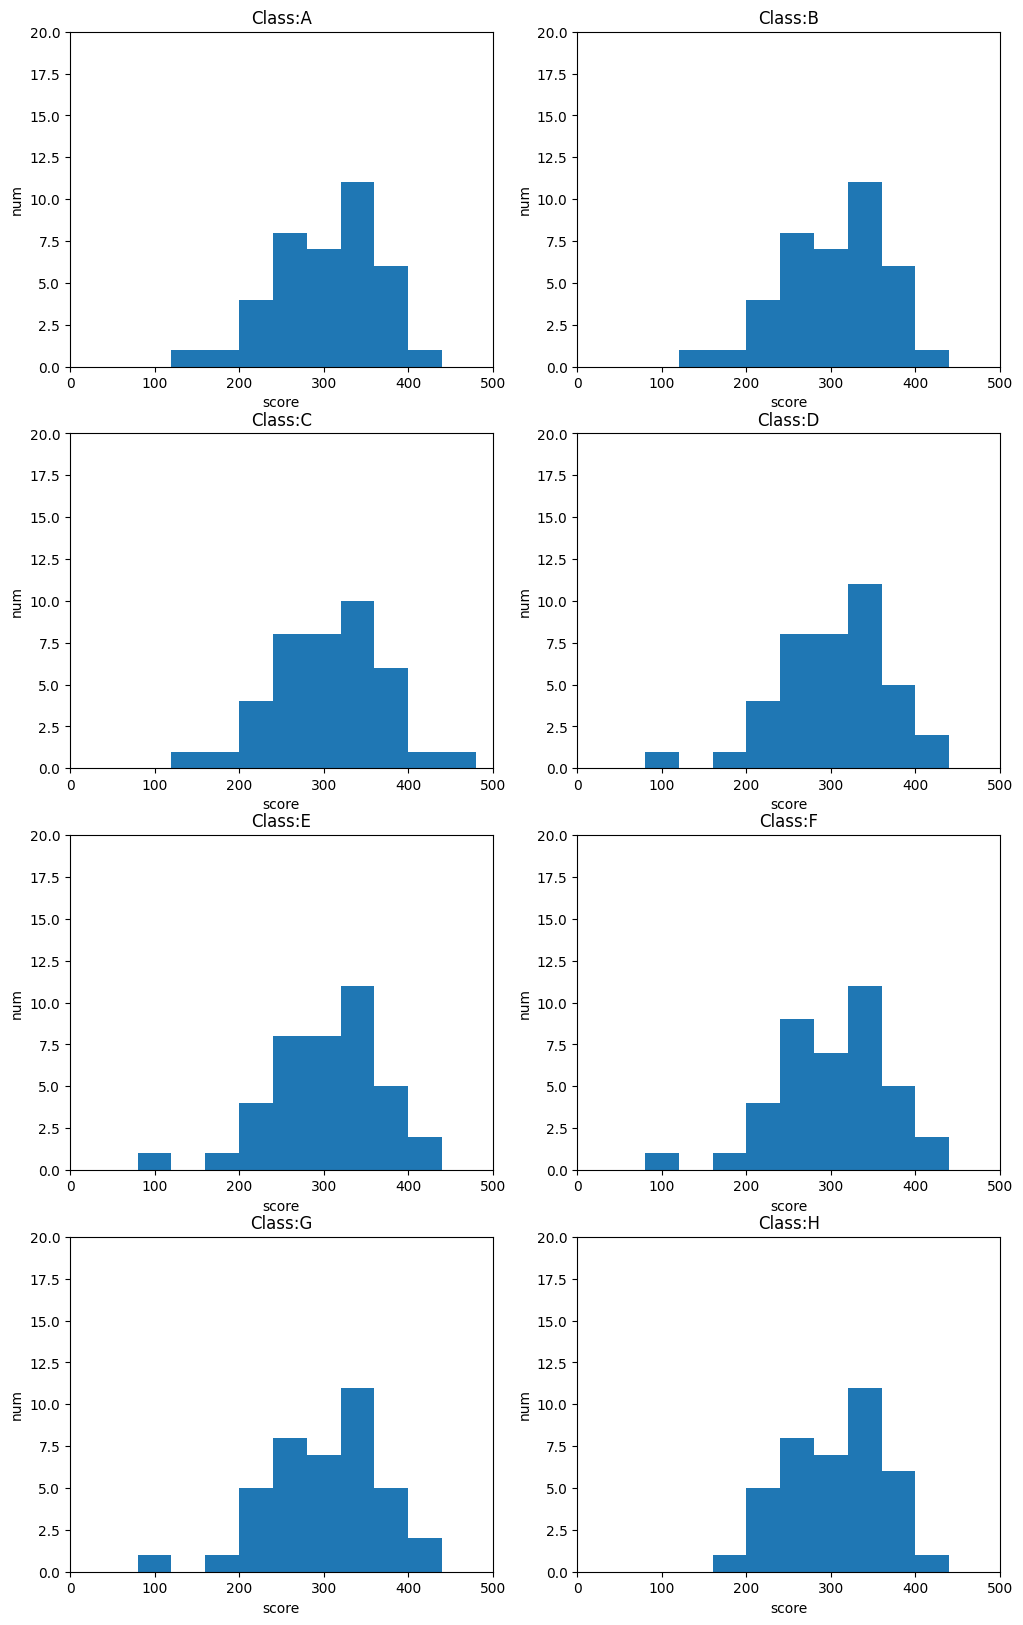

In [42]:
fig = plt.figure(figsize=(12, 20))
for i, c in enumerate(C):
    cls_df = s_df[s_df["init_assigned_class"] == c]
    ax = fig.add_subplot(
        4,
        2,
        i + 1,
        xlabel="score",
        ylabel="num",
        xlim=(0, 500),
        ylim=(0, 20),
        title="Class:{:s}".format(c),
    )
    ax.hist(cls_df["score"], bins=range(0, 500, 40))

In [ ]:
import pandas as pd
import pulp

# 生徒情報（students.csv）と「同じクラスにしてはいけないペア」（student_pairs.csv）を読み込む
# これらが数理最適化モデルにおける入力データとなる。
s_df = pd.read_csv("students.csv")
s_pair_df = pd.read_csv("student_pairs.csv")

# 数理最適化モデル（線形 / 整数計画）の定義
# 第2引数 LpMaximize により「最大化問題」として定義している。
# 今回は後で「初期クラス編成との一致度」を最大化する目的関数を追加する。
prob = pulp.LpProblem("ClassAssignmentProblem", pulp.LpMaximize)

# 生徒のリスト S = {1,2,...,N}
# student_id をそのまま生徒集合 S の要素として用いる。
S = s_df["student_id"].tolist()

# クラスのリスト C = {'A','B','C','D','E','F','G','H'}
# クラス数 |C| = 8 を固定として扱う。
C = ["A", "B", "C", "D", "E", "F", "G", "H"]

# 生徒とクラスのペアのリスト SC = S × C
# 各 (s, c) について 0–1 変数 x_(s,c) を定義するためのインデックスとなる。
SC = [(s, c) for s in S for c in C]

# 生徒をどのクラスに割り当てるかを表す 0–1 変数 x_(s,c) を定義
# x[s, c] = 1 なら「生徒 s をクラス c に割り当てる」、0 なら割り当てない。
# 全体として {x_(s,c) | (s,c)∈SC} ⊂ {0,1}^{|S||C|} という 0–1 変数ベクトルになる。
x = pulp.LpVariable.dicts("x", SC, cat="Binary")

# (1) 各生徒は 1 つのクラスに割り当てる制約
# 数学的には、各 s ∈ S について
#   Σ_{c∈C} x_(s,c) = 1
# を課している。
# これにより、
#   - 少なくとも 1 クラスに所属する（0 にはならない）
#   - 複数クラスにまたがって所属することはない（2 以上にはならない）
# という「排他的かつ網羅的な割当条件」が表現される。
for s in S:
    prob += pulp.lpSum([x[s, c] for c in C]) == 1

# (2) 各クラスの生徒数は 39 人以上 40 人以下という制約
# 各 c ∈ C について
#   39 ≤ Σ_{s∈S} x_(s,c) ≤ 40
# を課している。
# Σ_{s} x_(s,c) はクラス c の生徒数を表し、x_(s,c) は 0–1 なので必ず整数となる。
# これにより「極端な少人数クラス」や「オーバー定員クラス」が排除される。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S]) >= 39
    prob += pulp.lpSum([x[s, c] for s in S]) <= 40

# 男子生徒のリスト S_male = { s ∈ S | gender_s = 1 }
# s_df.itertuples() から gender == 1 の行のみを抽出している。
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

# 女子生徒のリスト S_female = { s ∈ S | gender_s = 0 }
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

# (3) 各クラスの男子生徒・女子生徒の人数は 20 人以下という制約
# 各 c ∈ C について
#   Σ_{s∈S_male}   x_(s,c) ≤ 20
#   Σ_{s∈S_female} x_(s,c) ≤ 20
# を課している。
# これは「性別ごとの人数に上限を課す」ことで、クラス内の男女比が
# 極端に偏らないようにするフェアネス制約の一種とみなせる。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_male]) <= 20
    prob += pulp.lpSum([x[s, c] for s in S_female]) <= 20

# 学力（テストスコア）を辞書に変換
# score[s] = 生徒 s の点数 という形でアクセスできるようにしておく。
# 後で「クラスごとの総得点」「平均点制約」を線形和で表す際に利用する。
score = {row.student_id: row.score for row in s_df.itertuples()}

# 学年全体の平均点（スカラー）を算出
# これはクラス平均点を制約する際の基準値（中心）として使用する。
score_mean = s_df["score"].mean()

# (4) 各クラスの学力試験の平均点は「学年平均点 ±10 点」とする制約
# クラス c の平均点は
#   ( Σ_{s∈S} x_(s,c) * score[s] ) / ( Σ_{s∈S} x_(s,c) )
# で定義されるが、そのままでは分数になり線形ではない。
# そこで、平均点が score_mean ±10 の範囲に収まる条件
#   (score_mean - 10) ≤ 平均点 ≤ (score_mean + 10)
# に両辺 Σ_{s} x_(s,c) を掛けることで、
#   (score_mean - 10) * Σ_{s} x_(s,c)
#       ≤ Σ_{s} x_(s,c) * score[s]
#       ≤ (score_mean + 10) * Σ_{s} x_(s,c)
# という線形不等式に変形している。
# 別途「クラス人数 39〜40」という制約を課しているため、
# Σ_{s} x_(s,c) が 0（空クラス）になることはなく、平均としての意味も保たれている。
for c in C:
    prob += pulp.lpSum([x[s, c] * score[s] for s in S]) >= (
        score_mean - 10
    ) * pulp.lpSum([x[s, c] for s in S])
    prob += pulp.lpSum([x[s, c] * score[s] for s in S]) <= (
        score_mean + 10
    ) * pulp.lpSum([x[s, c] for s in S])

# リーダー気質の生徒の集合 S_leader = { s ∈ S | leader_flag_s = 1 }
# 各クラスにおける「リーダー候補の人数」を数えるために利用する。
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

# (5) 各クラスにリーダー気質の生徒を 2 人以上割り当てる制約
# 各 c ∈ C について
#   Σ_{s∈S_leader} x_(s,c) ≥ 2
# を課している。
# これにより、どのクラスにも最低 2 人のリーダー候補が存在することが保証され、
# グループ活動や運営上の役割分担が成立しやすい編成になる。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_leader]) >= 2

# 特別な支援が必要な生徒の集合 S_support = { s ∈ S | support_flag_s = 1 }
# 各クラスにおける「要支援生徒の人数」を数えるために利用する。
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

# (6) 特別な支援が必要な生徒は各クラスに 1 人以下とする制約
# 各 c ∈ C について
#   Σ_{s∈S_support} x_(s,c) ≤ 1
# を課している。
# これにより、要支援生徒が特定クラスに集中して教員負担が偏る事態を防ぎ、
# 支援リソースをクラス間で分散させている。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_support]) <= 1

# 生徒の特定ペアリスト SS
# s_pair_df は「同じクラスにしてはいけない生徒ペア」を (student_id1, student_id2) の形で持つデータフレーム。
# SS = { (s1, s2), ... } として、ペアのリストを構成する。
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

# (7) 特定ペアの生徒は同一クラスに割り当てない制約
# 各ペア (s1, s2) ∈ SS と各クラス c ∈ C について
#   x_(s1,c) + x_(s2,c) ≤ 1
# を課している。
# これは 0–1 整数計画で頻出の「2 つのバイナリ変数を同時に 1 にしてはいけない」という制約であり、
# 一緒にしてはいけないペアが同じクラスに割り当てられる解を排除する。
for s1, s2 in SS:
    for c in C:
        prob += x[s1, c] + x[s2, c] <= 1

# --- ここから目的関数のための補助的な「初期クラス編成」を構成 ---

# 初期クラス編成を作成
# まず score に基づいてランキングを付与する。
# rank(ascending=False, method='first') により、
#   - 高得点ほど rank が小さい（1 位が最高得点）
#   - 同点の場合は出現順で順位を割り当て（同順位は作らない）
# という一意な順位 score_rank を構成する。
s_df["score_rank"] = s_df["score"].rank(ascending=False, method="first")

# 0〜7 をクラス 'A'〜'H' に対応させる辞書
# これを用いて「上位から順に A,B,...,H とローテーションでクラスを割り当てる」初期案を作る。
class_dic = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H"}

# score_rank を 8 で割った剰余（0〜7）にし、その値を class_dic でクラス名に変換する。
# つまり、
#   1 位 → 1 % 8 = 1 → 'B'
#   2 位 → 2 % 8 = 2 → 'C'
#   ...
#   7 位 → 7 % 8 = 7 → 'H'
#   8 位 → 8 % 8 = 0 → 'A'
#   9 位 → 1 → 'B'
# というように、学力上位から順に A〜H をラウンドロビンで割り当てる初期クラス編成案を作っている。
# これは「単純なルールで学力をクラス間に分散させる」ためのベースライン。
s_df["init_assigned_class"] = s_df["score_rank"].map(lambda x: x % 8).map(class_dic)

# 初期割当フラグ init_flag[(s,c)] を作成
# init_flag[(s,c)] = 1 なら「初期案では生徒 s はクラス c に所属」、0 ならそれ以外を表す。
# これは後で「初期案と最適化結果の一致度」を目的関数として評価するための重みになる。
init_flag = {(s, c): 0 for s in S for c in C}
for row in s_df.itertuples():
    init_flag[row.student_id, row.init_assigned_class] = 1

# 目的関数: 初期クラス編成と最適化結果のクラス編成をできるだけ一致させる
# 目的関数は
#   Σ_{(s,c)∈SC} x_(s,c) * init_flag_(s,c)
# を最大化する形になっている。
#
# init_flag_(s,c) は初期案でその生徒 s がクラス c に割り当てられているとき 1、そうでなければ 0。
# したがって、
#   - x_(s,c) = 1 かつ init_flag_(s,c) = 1 のときだけ 1 を寄与し、
#   - それ以外は 0 を寄与する。
# つまり、この和は「最適化結果と初期案でクラスが一致した生徒の人数」に相当し、
# それを最大化することで「初期編成からなるべく変えない解」を選びにいく。
# 制約によって満たすべき条件を守りつつ、初期案に近い解を優先する柔らかい方針付けになっている。
prob += pulp.lpSum([x[s, c] * init_flag[s, c] for s, c in SC])

# 求解（ソルバーで最適化を実行）
status = prob.solve()
print("Status:", pulp.LpStatus[status])

# 最適化結果の表示
# 各クラス c に割り当てられている生徒のリスト C2Ss[c] を構成する。
C2Ss = {}
for c in C:
    # x[s, c].value() == 1 の生徒 s だけを集めることで、
    # クラス c に所属する生徒 ID のリストを得る。
    C2Ss[c] = [s for s in S if x[s, c].value() == 1]

# 各クラスについて、クラス名・人数・生徒 ID の一覧を出力する。
# ここで人数が 39〜40 になっていれば、定員制約 (2) が満たされていることが確認できる。
for c, Ss in C2Ss.items():
    print("Class:", c)
    print("Num:", len(Ss))
    print("Student:", Ss)
    print()

In [45]:
# 検証用のデータフレームの用意
result_df2 = s_df.copy()

# 各生徒がどのクラスに割り当てられたかの情報を辞書に格納
S2C = {}
for s in S:
    S2C[s] = [c for c in C if x[s, c].value() == 1][0]

# 生徒データに各生徒が度のクラスに割り当てられたかの情報を結合
result_df2["assigned_class"] = result_df2["student_id"].map(S2C)
result_df2.head(5)

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class,assigned_class
0,1,0,0,0,335,109.0,F,F
1,2,1,0,0,379,38.0,G,A
2,3,0,0,0,350,79.0,H,H
3,4,0,0,0,301,172.0,E,E
4,5,1,0,0,317,147.0,D,D


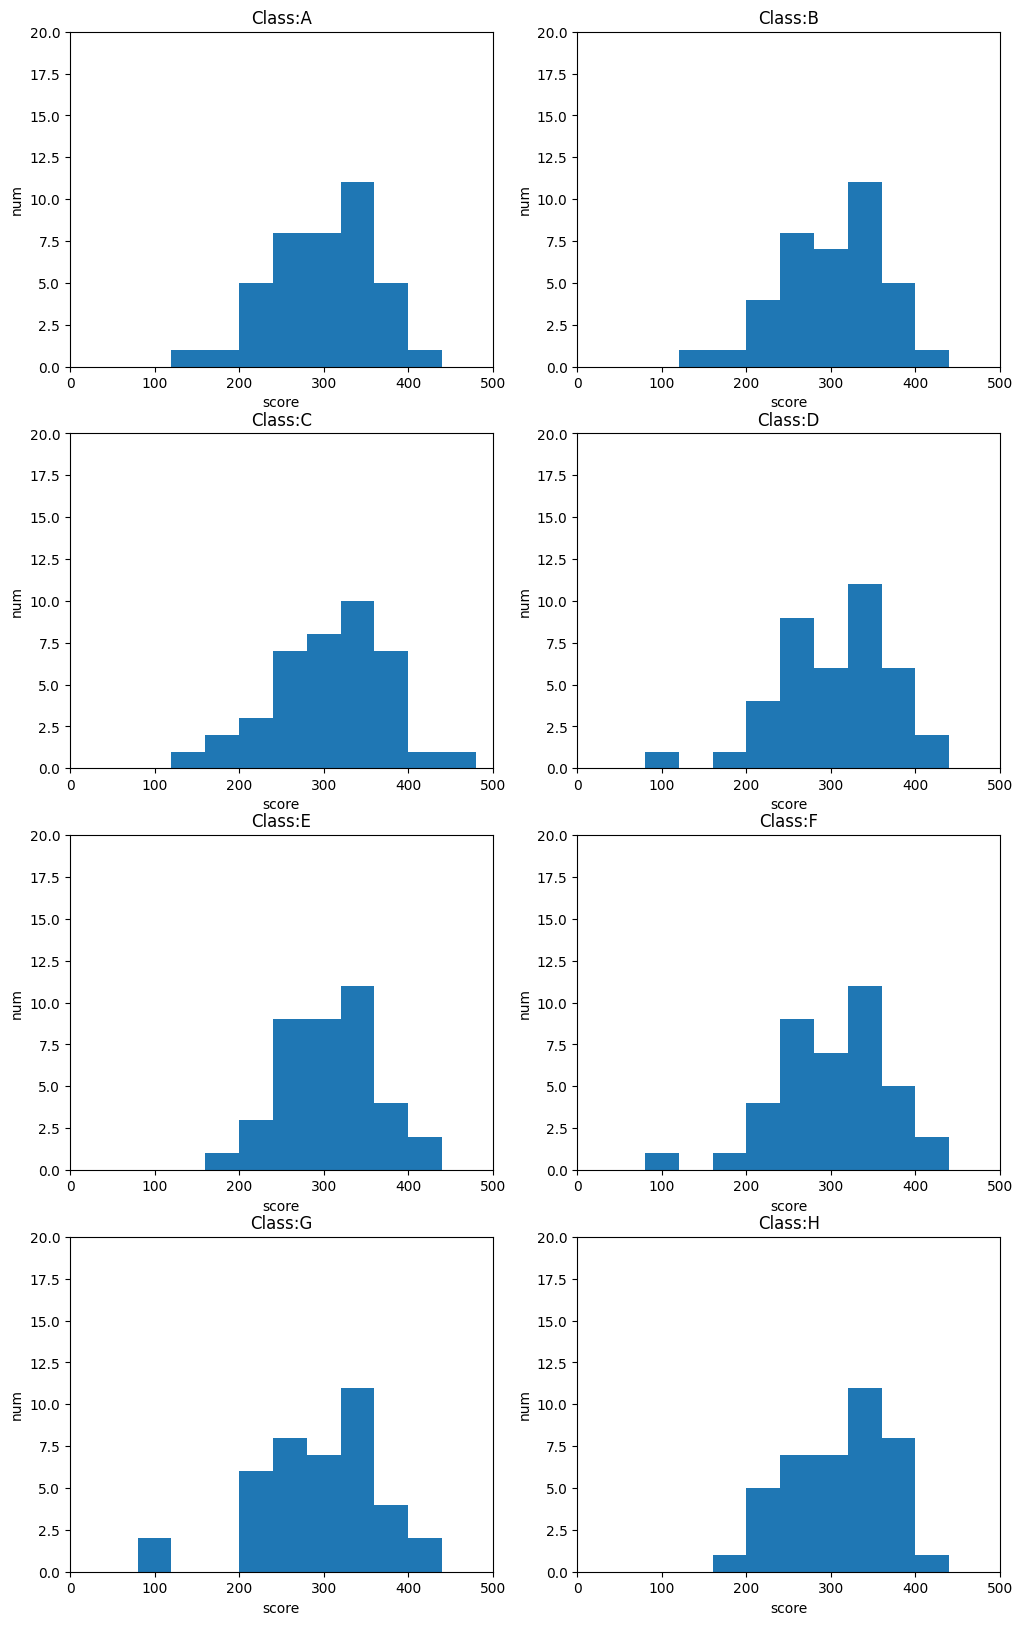

In [46]:
fig = plt.figure(figsize=(12, 20))
for i, c in enumerate(C):
    cls_df = result_df2[result_df2["assigned_class"] == c]
    ax = fig.add_subplot(
        4,
        2,
        i + 1,
        xlabel="score",
        ylabel="num",
        xlim=(0, 500),
        ylim=(0, 20),
        title="Class:{:s}".format(c),
    )
    ax.hist(cls_df["score"], bins=range(0, 500, 40))